
# Complain Classification Assignment
****


## Workflow

#### 1. Problem Statement and Dataset description
#### 2. Business objective and constrains 
#### 3. Machine learning Formulation and Evalution mtric
#### 4. Loading Dataset
#### 5. Exploratory Data Analyses
#### 6. Insights and Findings
#### 7. Pre-processing 
#### 8. Feature engineering
#### 9. Train Test Split and Modeling
#### 10. Hyperparameter tuning 
#### 11. Results and Conclusion

In [307]:
# Ignore all your warnings
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Libraries
import datetime
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
import pickle

import re
import pickle
from sklearn.model_selection import train_test_split

from tqdm import tqdm
import os
from wordcloud import WordCloud
from matplotlib_venn import venn2
import re
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
eng_stopwords = stopwords.words('english')
import gc
from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import tensorflow
import pylab 
import scipy.stats as stats
from scipy.stats import boxcox

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize, StandardScaler
from scipy import sparse as sp
from scipy.sparse import hstack


## 1. Problem Statement and Dataset description

* This is an NLP-based problem solving approach for the dataset available as a consumer-complaint database for the Banking sector. It contains 1,179,715 rows and 18 columns. The dataset contains 300k+ rows of complaints texts.

* We need to classify consumer complaints text into these categories: Debt collection, Consumer Loan, Mortgage, Credit card, Credit reporting, Student loan, Bank account or service, Payday loan, Money transfers, other financial service, prepaid card.


## 2. Business objective and constrains and Dataset Loading

#### 2.1 Business objective and constrains

* Automated model will be very useful for a customer service department that wants to classify the complaints they receive from their customers. The classification of the issues they have received into buckets will help the department to provide customized solutions to the customers in each group.

* This model can also be expanded into a system that can recommend automatic solutions to future complaints as they come in.

#### 2.2 Business constrains

1. Model should be interpretable.
2. Feature importance is a plus.
3. Probability score of complain_category. 

## 3. Machine learning Formulation and Evalution metric


##### This is a straight forward multi classification problem. 

We need to classify consumer complaints text into these categories: Debt collection, Consumer Loan, Mortgage, Credit card, Credit reporting, Student loan, Bank account or service, Payday loan, Money transfers, other financial service, prepaid card.

#### Evaluation metric

1. log loss
2. micro multi f1_score

## 4. Dataset Loading

In [2]:
data = pd.read_csv('consumer_complaints.csv',parse_dates=['date_received'])

print(f"shape of dataset {data.shape}\n")
data.sample(2)

shape of dataset (555957, 18)



,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
216352,04/15/2015,Debt collection,Payday loan,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company chooses not to provide a public response,"GMA Investments, LLC",MI,48304,NaN,Consent not provided,Web,04/15/2015,Closed with explanation,Yes,No,1331752
552854,02/17/2016,Bank account or service,Checking account,"Making/receiving payments, sending money",NaN,"On XXXX XXXX, 2016, I initiated a "" Send Money...",Company believes it acted appropriately as aut...,USAA Savings,NY,100XX,Servicemember,Consent provided,Web,02/17/2016,Closed with monetary relief,Yes,No,1790591


## 5. Exploratory Data Analyses

### 5.1. Overview of dataset 

In [60]:
print(f"shape of dataset {data.shape}\n")
data.sample(2)

shape of dataset (555957, 18)



,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
154208,2014-11-14,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"Expert Global Solutions, Inc.",OK,74136,NaN,NaN,Web,11/15/2014,Closed with explanation,Yes,No,1117837
487379,2014-01-17,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"Phillips & Cohen Associates, Ltd.",NY,11554,NaN,NaN,Web,01/16/2014,Closed with non-monetary relief,Yes,Yes,674460


In [61]:
# Basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
date_received                   555957 non-null datetime64[ns]
product                         555957 non-null object
sub_product                     397635 non-null object
issue                           555957 non-null object
sub_issue                       212622 non-null object
consumer_complaint_narrative    66806 non-null object
company_public_response         85124 non-null object
company                         555957 non-null object
state                           551070 non-null object
zipcode                         551452 non-null object
tags                            77959 non-null object
consumer_consent_provided       123458 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null object
company_response_to_consumer    555957 non-null object
timely_response                 555957 non-null object
cons

In [62]:
# dataset attributes containing null values
data.isnull().any()

date_received                   False
product                         False
sub_product                      True
issue                           False
sub_issue                        True
consumer_complaint_narrative     True
company_public_response          True
company                         False
state                            True
zipcode                          True
tags                             True
consumer_consent_provided        True
submitted_via                   False
date_sent_to_company            False
company_response_to_consumer    False
timely_response                 False
consumer_disputed?              False
complaint_id                    False
dtype: bool

* There are definetely some features which has null values.

### 5.2. EDA: product (Class_label)

In [63]:
# The category of products is the class labels here which we need to predict

# Class label
y = data['product'] 
# Features
X = data.drop(axis=0,columns='product')

print(f"There are {len(y.unique())} Categories in which we need to categorise the complaints :\n")
for idx, category in enumerate(y.unique()):
    print(idx+1,":",category)

There are 11 Categories in which we need to categorise the complaints :

1 : Mortgage
2 : Credit reporting
3 : Student loan
4 : Debt collection
5 : Credit card
6 : Bank account or service
7 : Consumer Loan
8 : Money transfers
9 : Payday loan
10 : Prepaid card
11 : Other financial service


#### 5.2.1. Distribution of class labels

In [64]:
# null values in class_labels
print(f"Any null values in class_labels: {y.isnull().any()}")

Any null values in class_labels: False


In [65]:
# Dataframe of distribution of class label
pd.DataFrame({"categories": (y.value_counts().index), "frequency":y.value_counts().values, "distribution_probabily": y.value_counts().values/sum(y.value_counts().values)})

,categories,frequency,distribution_probabily
0,Mortgage,186475,0.335413
1,Debt collection,101052,0.181762
2,Credit reporting,91854,0.165218
3,Credit card,66468,0.119556
4,Bank account or service,62563,0.112532
5,Consumer Loan,20990,0.037755
6,Student loan,15839,0.028490
7,Payday loan,3877,0.006974
8,Money transfers,3812,0.006857
9,Prepaid card,2470,0.004443


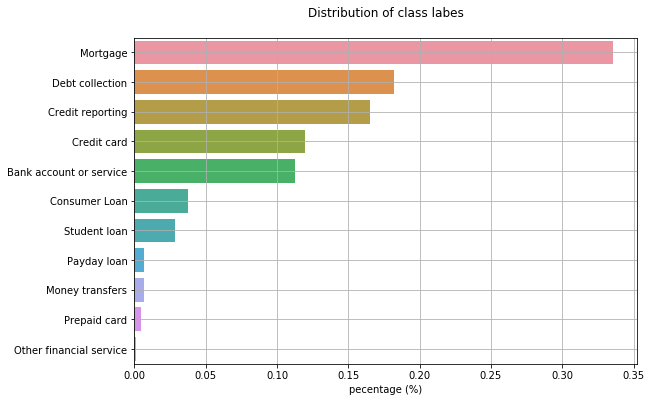

In [186]:
# Visualisation of distribution of class label
plt.figure(figsize=(9,6))
sns.barplot(x= (y.value_counts().values/sum(y.value_counts().values)), y =(y.value_counts().index) )
plt.title("Distribution of class labes\n")
plt.xlabel("pecentage (%)")
plt.grid()
plt.show()


Observation:
* Clearly the class_labels are are imbalaced so we need to keep this in mind that we don't underfit on majority class.
* 'Mortgage' category has highest distribution mong all (~33%).
* The Distribution of 'Other financial service' is minimum among all(~0.01%).

##### Features or attributes given to predict class_labels

In [67]:
#Features or attributes give to predict those features
for idx, col in enumerate(X.columns):
    print(idx+1, ":", col)

1 : date_received
2 : sub_product
3 : issue
4 : sub_issue
5 : consumer_complaint_narrative
6 : company_public_response
7 : company
8 : state
9 : zipcode
10 : tags
11 : consumer_consent_provided
12 : submitted_via
13 : date_sent_to_company
14 : company_response_to_consumer
15 : timely_response
16 : consumer_disputed?
17 : complaint_id


### 5.3. EDA: complaint_id

In [80]:
# Any null complaint_id 
print(f"Any null values in 'complaint_id' columns: {X.complaint_id.isnull().any()}\n")

# Any null complaint_id 
print(f"Any duplicate values in 'complaint_id' columns: {(X.duplicated(subset='complaint_id')).any()}")

Any null values in 'complaint_id' columns: False

Any duplicate values in 'complaint_id' columns: False


* complaint_id identify each complain uniquely and is primary key of this data

### 5.3. EDA: date_recieved

In [81]:
# Any null date_recieved 
print(f"Any null values in 'date_recieved' columns: {X.date_received.isnull().any()}")

Any null values in 'date_recieved' columns: False


#### 5.3.1. Distribution of complains based on date_recieved

In [92]:
## Range of timestamp in this perticular dataset
print(f"Range of timestamp in dataset: {temp.min()} ----{temp.max()}")

Range of timestamp in dataset: 2011-12-01 00:00:00 ----2016-04-25 00:00:00


##### Weakely and monthly patterns of number of complains recieved

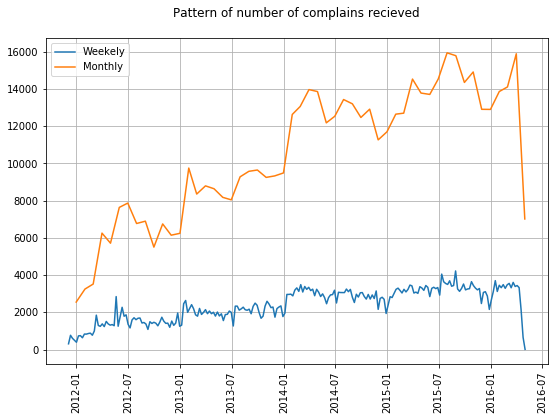

In [158]:
# Weakely Pattern and monthly patterns of number of complains recieved
week_pattern = data.set_index(['date_received']).resample("W")["complaint_id"].count()
month_pattern = data.set_index(['date_received']).resample("M")["complaint_id"].count()

plt.figure(figsize=(9,6))
plt.plot(week_pattern.index,week_pattern.values, label = 'Weekely')
plt.plot(month_pattern.index,month_pattern.values, label = 'Monthly')
plt.legend()
plt.title("Pattern of number of complains recieved\n")
plt.xticks(rotation=90)
plt.grid()


#### 5.4. EDA: sub_product

In [208]:
#number of unique 'sub_product
print(f"Number of unique 'sub_product': {len(data.sub_product.unique())}\n")

# Any null sub_product 
print(f"Number of  null values in 'sub_product' columns: {sum(data.sub_product.isnull())} ({round((sum(data.sub_product.isnull())/data.shape[0])*100,2)} %)\n")


Number of unique 'sub_product': 47

Number of  null values in 'sub_product' columns: 158322 (28.48 %)



#### 5.4.1. Distribution of sub_product

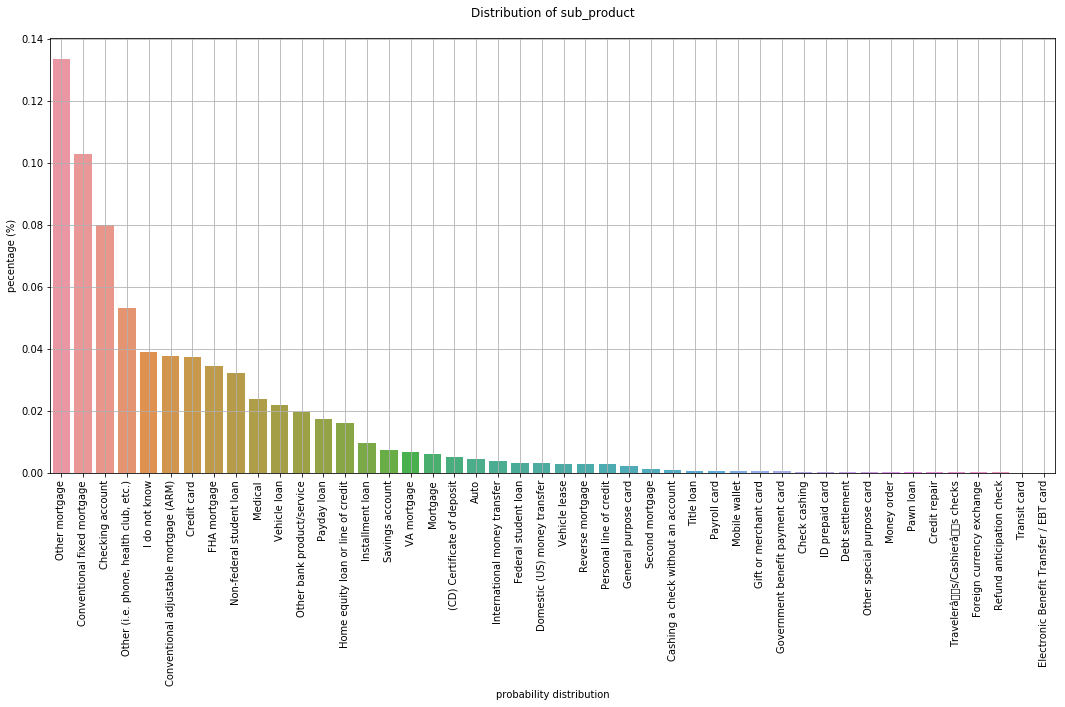

In [198]:
# Visualisation of distribution of sub_product

sub_product_value_count=(data.sub_product.value_counts(dropna=False))

plt.figure(figsize=(18,8))
sns.barplot(x= (sub_product_value_count.index) , y = (sub_product_value_count.values/sum(sub_product_value_count.values)) )
plt.title("Distribution of sub_product\n")
plt.xlabel("probability distribution")
plt.ylabel("pecentage (%)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 5.5. EDA: consumer_complaint_narrative

In [242]:
# Number of complaints having null 'consumer_complaint_narrative'
print(f"Number of  null values in 'consumer_complaint_narrative' columns: {sum(data.consumer_complaint_narrative.isnull())} ({round((sum(data.consumer_complaint_narrative.isnull())/data.shape[0])*100,2)} %)\n")

# Number of complaints in 'consumer_complaint_narrative'
print(f"Number of complaints having 'consumer_complaint_narrative': {sum(data.consumer_complaint_narrative.notnull())} ({round((sum(data.consumer_complaint_narrative.notnull())/data.shape[0])*100,2)} %)\n")

Number of  null values in 'consumer_complaint_narrative' columns: 489151 (87.98 %)

Number of complaints having 'consumer_complaint_narrative': 66806 (12.02 %)



#### 5.5.1. How many duplicate consumer_complaint_narrative are present in dataset?

In [272]:
#Number of duplicate consumer_complaint_narrative out of total complaints having 'consumer_complaint_narrative'
print(f"Number of duplicate consumer_complaint_narrative: {sum(data[data['consumer_complaint_narrative'].notnull()].duplicated(subset=['consumer_complaint_narrative']))}\n")

dup_complain_narrative_txt = round((sum(data[data['consumer_complaint_narrative'].notnull()].duplicated(subset=['consumer_complaint_narrative'])))/sum(data.consumer_complaint_narrative.notnull())*100,2)
print(f"{dup_complain_narrative_txt} % of total consumer_complaint_narrative given is duplicate.")

Number of duplicate consumer_complaint_narrative: 1160

1.74 % of total consumer_complaint_narrative given is duplicate.


#### 5.5.2. how many complaints has same consumer_complaint_narrative as well as same class label

In [280]:
print(f"Number of complaints having same consumer_complaint_narrative as well as same class_labels: {sum(data[data['consumer_complaint_narrative'].notnull()].duplicated(subset=['consumer_complaint_narrative','product']))}")


Number of complaints having same consumer_complaint_narrative as well as same class_labels: 1141


#### Utility Functions for text data

In [312]:
# Utility function for box plot
def box_plot(data, feature_name=None):
    
    plt.figure(figsize=(26,4))
    sns.violinplot(data,color='darkred')
    plt.title(f'Train : violinplot Plot for {feature_name} \n')
    plt.xlabel(f"{feature_name}")
    plt.ylabel(f"Distribution")   
    plt.grid()
    plt.show()

# Utility function to check if feature or variable follows Normal distribution using Q-Q Plot   
def q_q_plot(data, feature_name=None):
    """
    # code refer: https://stackoverflow.com/a/13865874
    """
    f, (ax1) = plt.subplots(1, 1, figsize=(7, 5))
    
    measurements = data
    stats.probplot(measurements, dist="norm", plot=ax1)
    ax1.set(title=f' Q-Q Plot for {feature_name} \n')


#### 5.5.3. Number of words in consumer_complaint_narrative

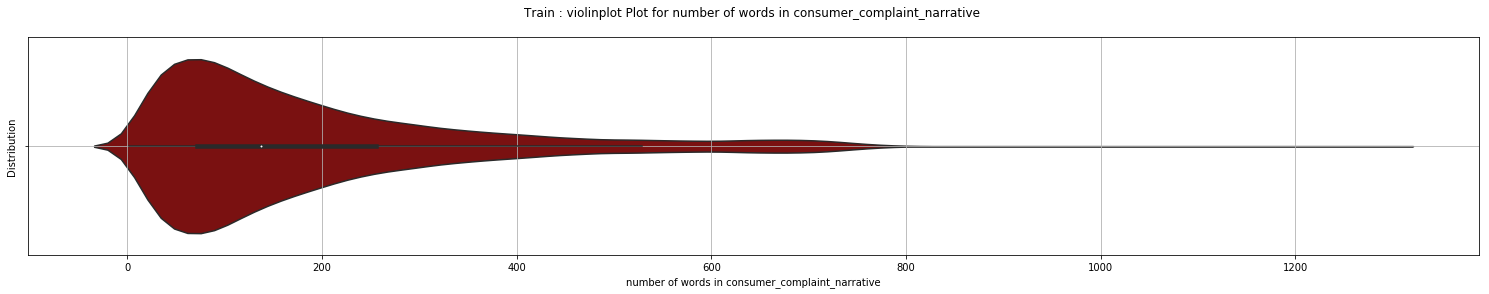

In [302]:
# number of words in consumer_complaint_narrative
n_words_in_consumer_complaint_narrative = sorted(data[data['consumer_complaint_narrative'].notnull()]['consumer_complaint_narrative'].apply(lambda x: len(x.split(" "))),reverse=True)

# Box plot of  number of words in consumer_complaint_narrative
box_plot(n_words_in_consumer_complaint_narrative, "number of words in consumer_complaint_narrative" )

* Distribution of Number of words in consumer_complaint_narrative is highly skewed towards the right (like log normal distribution)
* There is possibilities that it follows Normal distribution. Let's check it out using Q-Q plot

##### Q-Q Plot of Distribution of number of words in consumer_complaint_narrative

"\n# Saving box_cox_n_words_in_question_body as feature\ndata[data['consumer_complaint_narrative'].notnull()]['box_cox_n_words_in_consumer_complaint_narrative'] = box_cox_n_words_in_question_body_train \n"

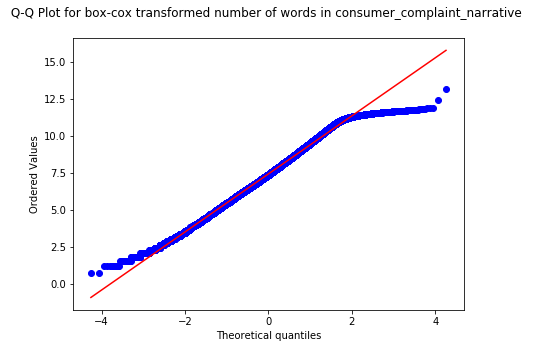

In [313]:
# Boxcox transformation
box_cox_n_words_in_consumer_complaint_narrative = boxcox(n_words_in_consumer_complaint_narrative)[0]

# Checking weather box cox transformed len_question_body_box_cox follows normal distribution or not using Q-Q plot
q_q_plot(box_cox_n_words_in_consumer_complaint_narrative, "box-cox transformed number of words in consumer_complaint_narrative ")

"""
# Saving box_cox_n_words_in_question_body as feature
data[data['consumer_complaint_narrative'].notnull()]['box_cox_n_words_in_consumer_complaint_narrative'] = box_cox_n_words_in_question_body_train 
"""



* It is hard to say that this distribution follows gaussian Distribution.

#### 5.5.4. WordCloud of consumer_complaint_narrative

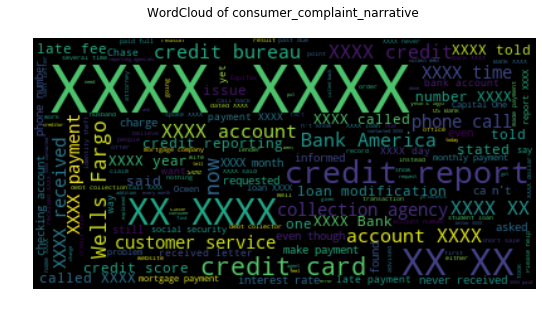

In [315]:
# refer: https://www.datacamp.com/community/tutorials/wordcloud-python

text = " ".join(word for word in data[data['consumer_complaint_narrative'].notnull()]['consumer_complaint_narrative'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud of consumer_complaint_narrative \n")
plt.axis("off")
plt.show()

* There is alot of text containing financial amount. It would better to preprocess it before visualising WorldCloud.

In [ ]:

# Preprocessing

#data[data['consumer_complaint_narrative'].notnull()]['consumer_complaint_narrative']

#### 5.6. EDA: company

In [321]:
# Any null values for company column
sum(data.company.isnull())

0

In [322]:
# Number of unique company 
print(f"Number of unique company : {len(data.company.unique())}")

Number of unique company : 3605


#### 5.6.1. Counts of complaints by 'company': Top 50

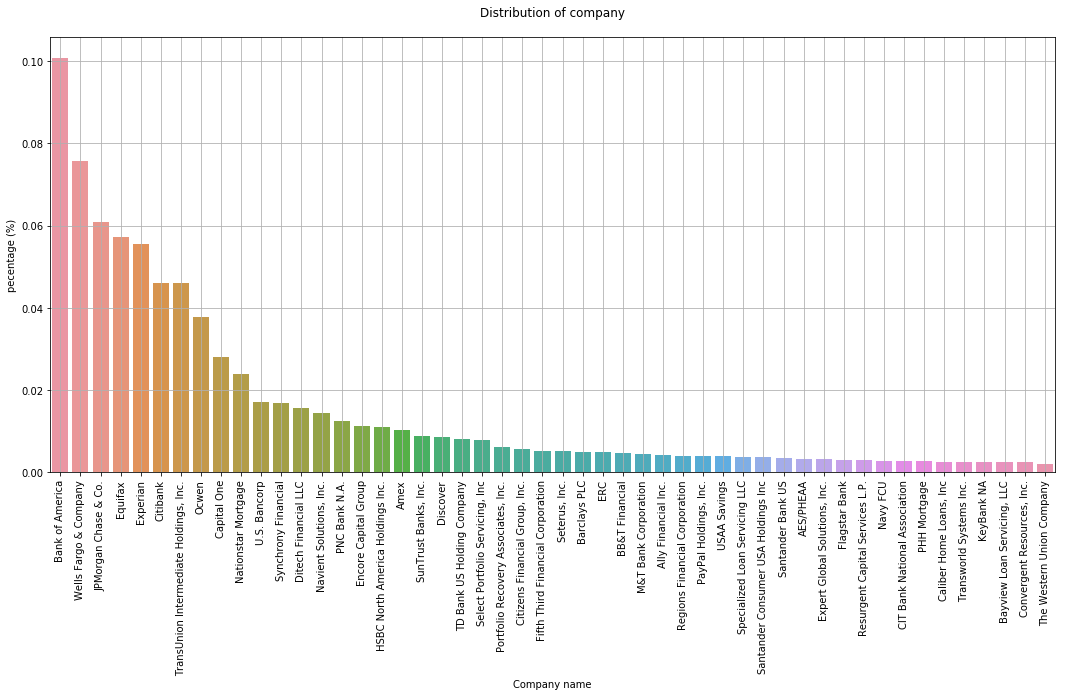

In [351]:
# Distribution of 'company' ( top 50)
company_value_count = data.company.value_counts()

plt.figure(figsize=(18,8))
sns.barplot(x= (company_value_count.index)[:50] , y = (company_value_count.values/sum(company_value_count.values))[:50] )
plt.title("Distribution of company\n")
plt.xlabel("Company name")
plt.ylabel("pecentage (%)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

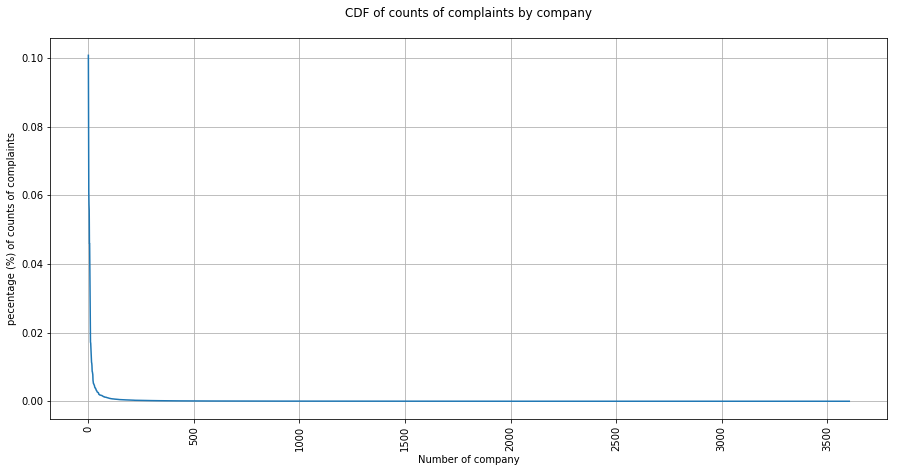

In [340]:
# CDF of counts of complaints by company

plt.figure(figsize=(15,7))
plt.plot(company_value_count.values/sum(company_value_count.values))
plt.title("CDF of counts of complaints by company\n")
plt.xlabel("Number of company")
plt.ylabel("pecentage (%) of counts of complaints")
plt.xticks(rotation=90)
plt.grid()
plt.show()

* There are very few companies which has very large number of consumer complaints.
* Large number of companies has very few complaints. 

### 5.7. EDA: state

In [347]:
# Any null values for state column
print(f"Number of complaints having null state column: {sum(data.state.isnull())} ({round((sum(data.state.isnull())/data.shape[0])*100,2)})%")

Number of complaints having null state column: 4887 (0.88)%


In [348]:
# Number of unique company 
print(f"Number of unique state : {len(data.state.unique())}")

Number of unique state : 63


#### 5.7.1. Dsitribution of complaints based on state

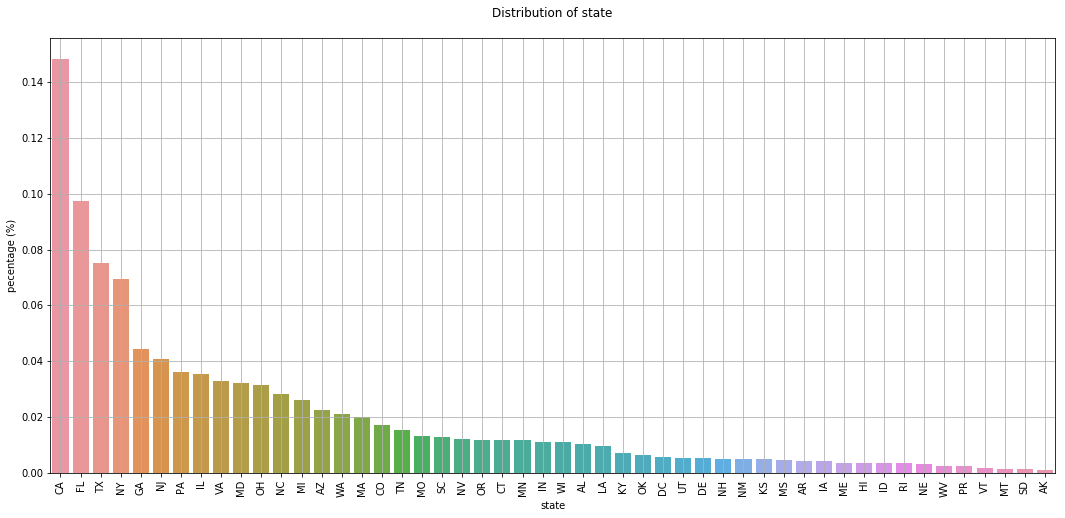

In [350]:
# Dsitribution of complaints based on state

# Distribution of 'company' ( top 50)
company_value_count = data.state.value_counts()

plt.figure(figsize=(18,8))
sns.barplot(x= (company_value_count.index)[:50] , y = (company_value_count.values/sum(company_value_count.values))[:50] )
plt.title("Distribution of state\n")
plt.xlabel("state")
plt.ylabel("pecentage (%)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
data.state

In [356]:
data.groupby(['state','product'])[['product']].count()

product
state product                         
AA    Bank account or service        1
      Credit card                    2
      Mortgage                       4
      Student loan                   2
AE    Bank account or service       21
      Consumer Loan                 15
      Credit card                   24
      Credit reporting              47
      Debt collection               31
      Money transfers                2
      Mortgage                      68
      Prepaid card                   1
      Student loan                  10
AK    Bank account or service       66
      Consumer Loan                 19
      Credit card                   98
      Credit reporting             120
      Debt collection              145
      Money transfers                8
      Mortgage                     157
      Payday loan                    5
      Prepaid card                   3
      Student loan                  17
AL    Bank account or service      600
      Consumer Loan                373
      Credit card                  552
      Credit reporting            1096
      Debt collection             1312
      Money transfers               29
      Mortgage                    1395
...                                ...
WI    Consumer Loan                266
      Credit card                  993
      Credit reporting             798
      Debt collection             1159
      Money transfers               46
      Mortgage                    1955
      Other financial service        7
      Payday loan                   75
      Prepaid card                  45
      Student loan                 209
WV    Bank account or service      139
      Consumer Loan                 72
      Credit card                  182
      Credit reporting             322
      Debt collection              287
      Money transfers               17
      Mortgage                     342
      Other financial service        6
      Prepaid card                   7
      Student loan                  83
WY    Bank account or service       34
      Consumer Loan                 22
      Credit card                   60
      Credit reporting             123
      Debt collection              128
      Money transfers                1
      Mortgage                     151
      Other financial service        1
      Payday loan                    8
      Student loan                  23

[630 rows x 1 columns]

In [58]:
X.sample(2).T

,407634,379735
date_received,04/09/2012,06/04/2013
sub_product,Other mortgage,Conventional fixed mortgage
issue,"Loan modification,collection,foreclosure","Loan modification,collection,foreclosure"
sub_issue,NaN,NaN
consumer_complaint_narrative,NaN,NaN
company_public_response,NaN,NaN
company,Bank of America,JPMorgan Chase & Co.
state,FL,AZ
zipcode,33412,86401
tags,NaN,NaN


In [59]:
len(X.complaint_id.unique())

555957

In [61]:
X.shape

(555957, 17)

In [62]:
len(X.date_received.unique())

1608